In [8]:
import requests
from bs4 import BeautifulSoup

In [12]:
def get_soup(url):
  r = requests.get(url)
  soup = BeautifulSoup(r.text,'html.parser')
  return soup

In [13]:
review_list=[]


In [15]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for i in reviews:
            review  = i.find('span', {'data-hook': 'review-body'}).text.strip()    
            review_list.append(review)
    except:
        pass

In [16]:
for x in range(1,400):
    soup = get_soup(f'https://www.amazon.in/American-Tourister-AMT-SCH-02/product-reviews/B07CJCGM1M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    print(len(review_list))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
221

In [17]:
import pandas as pd

df = pd.DataFrame(review_list, columns = ['Reviews'])
df

Reviews
0     I got a defective piece. Since I was not at my...
1     This bag is of the lowest quality you can imag...
2     Received the bag in the worst packaging I have...
3     The stiches of the  bag is started coming out ...
4     Very nice bag ....Very light....And spacious. ...
...                                                 ...
3955  Totally disappointed..Not at all worth buying....
3956  Product is good with classy looks...Have enoug...
3957  I got this for 803 ...at this price it's great...
3958  I got this bag just a moment ago..And my react...
3959  Initially the bag was very good. But with the ...

[3960 rows x 1 columns]

In [18]:
df.to_csv('Amazon_reviews.csv', index = False)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import itertools
sns.set()

In [26]:
df = pd.read_csv('/content/Amazon_reviews.csv')
df

Reviews
0     I got a defective piece. Since I was not at my...
1     This bag is of the lowest quality you can imag...
2     Received the bag in the worst packaging I have...
3     The stiches of the  bag is started coming out ...
4     Very nice bag ....Very light....And spacious. ...
...                                                 ...
3955  Totally disappointed..Not at all worth buying....
3956  Product is good with classy looks...Have enoug...
3957  I got this for 803 ...at this price it's great...
3958  I got this bag just a moment ago..And my react...
3959  Initially the bag was very good. But with the ...

[3960 rows x 1 columns]

In [27]:
df.shape

(3960, 1)

In [28]:
data = [i.strip() for i in df['Reviews']]
data = [i for i in data if i]
data[0:5]

["I got a defective piece. Since I was not at my home during the delivery period, I couldn't ask for replacement. I'm trying to claim warranty, but I didn't get any assistance.",
 "This bag is of the lowest quality you can imagine. I am sure it's a duplicate one and not original. The inner partitions are so thin that they will tear off after 3-4 use. Returning the item.",
 'Received the bag in the worst packaging I have seen in my e commerce experience.Also the bag though seemed original seemed to be of poor quality.The partition cloth seemed weak and the mesh for carrying bottle around seemed fragile.Overall 2 stars for Amazon and not for the product1 for timely delivery, and2 for accepting the refund!',
 'The stiches of the  bag is started coming out in 6 months. Feel the cloth is of poor quality.how to return the bag for availing the warranty, can anyone please adviseReturning the materials after the Amazon window closes is an Herculean task, the bag has become a burden for me now',

In [30]:
data_tx =' '.join(data)
data_tx

"I got a defective piece. Since I was not at my home during the delivery period, I couldn't ask for replacement. I'm trying to claim warranty, but I didn't get any assistance. This bag is of the lowest quality you can imagine. I am sure it's a duplicate one and not original. The inner partitions are so thin that they will tear off after 3-4 use. Returning the item. Received the bag in the worst packaging I have seen in my e commerce experience.Also the bag though seemed original seemed to be of poor quality.The partition cloth seemed weak and the mesh for carrying bottle around seemed fragile.Overall 2 stars for Amazon and not for the product1 for timely delivery, and2 for accepting the refund! The stiches of the  bag is started coming out in 6 months. Feel the cloth is of poor quality.how to return the bag for availing the warranty, can anyone please adviseReturning the materials after the Amazon window closes is an Herculean task, the bag has become a burden for me now Very nice bag 

In [32]:
punc_tx =data_tx.translate(str.maketrans('','',string.punctuation))
punc_tx

'I got a defective piece Since I was not at my home during the delivery period I couldnt ask for replacement Im trying to claim warranty but I didnt get any assistance This bag is of the lowest quality you can imagine I am sure its a duplicate one and not original The inner partitions are so thin that they will tear off after 34 use Returning the item Received the bag in the worst packaging I have seen in my e commerce experienceAlso the bag though seemed original seemed to be of poor qualityThe partition cloth seemed weak and the mesh for carrying bottle around seemed fragileOverall 2 stars for Amazon and not for the product1 for timely delivery and2 for accepting the refund The stiches of the  bag is started coming out in 6 months Feel the cloth is of poor qualityhow to return the bag for availing the warranty can anyone please adviseReturning the materials after the Amazon window closes is an Herculean task the bag has become a burden for me now Very nice bag Very lightAnd spacious 

In [33]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk import word_tokenize
tx_tokens=word_tokenize(punc_tx)
print(tx_tokens[0:50])

['I', 'got', 'a', 'defective', 'piece', 'Since', 'I', 'was', 'not', 'at', 'my', 'home', 'during', 'the', 'delivery', 'period', 'I', 'couldnt', 'ask', 'for', 'replacement', 'Im', 'trying', 'to', 'claim', 'warranty', 'but', 'I', 'didnt', 'get', 'any', 'assistance', 'This', 'bag', 'is', 'of', 'the', 'lowest', 'quality', 'you', 'can', 'imagine', 'I', 'am', 'sure', 'its', 'a', 'duplicate', 'one', 'and']


In [35]:
len(tx_tokens)


178200

In [36]:
sw = pd.read_csv('/content/stop.txt')

In [37]:
sw

a
0           a's
1          able
2         about
3         above
4     according
..          ...
565       yours
566    yourself
567  yourselves
568           z
569        zero

[570 rows x 1 columns]

In [38]:
no_stop_tokens=[word for word in tx_tokens if not word in sw]
print(no_stop_tokens)

['I', 'got', 'defective', 'piece', 'Since', 'I', 'was', 'not', 'at', 'my', 'home', 'during', 'the', 'delivery', 'period', 'I', 'couldnt', 'ask', 'for', 'replacement', 'Im', 'trying', 'to', 'claim', 'warranty', 'but', 'I', 'didnt', 'get', 'any', 'assistance', 'This', 'bag', 'is', 'of', 'the', 'lowest', 'quality', 'you', 'can', 'imagine', 'I', 'am', 'sure', 'its', 'duplicate', 'one', 'and', 'not', 'original', 'The', 'inner', 'partitions', 'are', 'so', 'thin', 'that', 'they', 'will', 'tear', 'off', 'after', '34', 'use', 'Returning', 'the', 'item', 'Received', 'the', 'bag', 'in', 'the', 'worst', 'packaging', 'I', 'have', 'seen', 'in', 'my', 'e', 'commerce', 'experienceAlso', 'the', 'bag', 'though', 'seemed', 'original', 'seemed', 'to', 'be', 'of', 'poor', 'qualityThe', 'partition', 'cloth', 'seemed', 'weak', 'and', 'the', 'mesh', 'for', 'carrying', 'bottle', 'around', 'seemed', 'fragileOverall', '2', 'stars', 'for', 'Amazon', 'and', 'not', 'for', 'the', 'product1', 'for', 'timely', 'delive

In [39]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['i', 'got', 'defective', 'piece', 'since', 'i', 'was', 'not', 'at', 'my', 'home', 'during', 'the', 'delivery', 'period', 'i', 'couldnt', 'ask', 'for', 'replacement', 'im', 'trying', 'to', 'claim', 'warranty', 'but', 'i', 'didnt', 'get', 'any', 'assistance', 'this', 'bag', 'is', 'of', 'the', 'lowest', 'quality', 'you', 'can', 'imagine', 'i', 'am', 'sure', 'its', 'duplicate', 'one', 'and', 'not', 'original', 'the', 'inner', 'partitions', 'are', 'so', 'thin', 'that', 'they', 'will', 'tear', 'off', 'after', '34', 'use', 'returning', 'the', 'item', 'received', 'the', 'bag', 'in', 'the', 'worst', 'packaging', 'i', 'have', 'seen', 'in', 'my', 'e', 'commerce', 'experiencealso', 'the', 'bag', 'though', 'seemed', 'original', 'seemed', 'to', 'be', 'of', 'poor', 'qualitythe', 'partition', 'cloth', 'seemed', 'weak', 'and', 'the', 'mesh', 'for', 'carrying', 'bottle', 'around', 'seemed', 'fragileoverall', '2', 'stars', 'for', 'amazon', 'and', 'not', 'for', 'the', 'product1', 'for', 'timely', 'delive

In [40]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i got defective piece since i was not at my home during the delivery period i couldnt ask for replacement im trying to claim warranty but i didnt get any assistance this bag is of the lowest quality you can imagine i am sure its duplicate one and not original the inner partitions are so thin that they will tear off after 34 use returning the item received the bag in the worst packaging i have seen in my e commerce experiencealso the bag though seemed original seemed to be of poor qualitythe partition cloth seemed weak and the mesh for carrying bottle around seemed fragileoverall 2 stars for amazon and not for the product1 for timely delivery and2 for accepting the refund the stiches of the bag is started coming out in 6 months feel the cloth is of poor qualityhow to return the bag for availing the warranty can anyone please advisereturning the materials after the amazon window closes is an herculean task the bag has become burden for me now very nice bag very lightand spacious totally 

In [43]:
lemmas=[token.lemma_ for token in doc]
cl_rev=' '.join(lemmas)
cl_rev

"I get defective piece since I be not at my home during the delivery period I could not ask for replacement I m try to claim warranty but I do not get any assistance this bag be of the low quality you can imagine I be sure its duplicate one and not original the inner partition be so thin that they will tear off after 34 use return the item receive the bag in the bad packaging I have see in my e commerce experiencealso the bag though seem original seem to be of poor qualitythe partition cloth seem weak and the mesh for carry bottle around seem fragileoverall 2 star for amazon and not for the product1 for timely delivery and2 for accept the refund the stiche of the bag be start come out in 6 month feel the cloth be of poor qualityhow to return the bag for avail the warranty can anyone please advisereturne the material after the amazon window close be an herculean task the bag have become burden for I now very nice bag very lightand spacious totally disappointednot at all worth buy it see

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [46]:
print(cv.vocabulary_)

{'get': 78, 'defective': 55, 'piece': 128, 'since': 154, 'be': 26, 'not': 113, 'at': 20, 'my': 110, 'home': 86, 'during': 65, 'the': 170, 'delivery': 56, 'period': 127, 'could': 52, 'ask': 18, 'for': 75, 'replacement': 144, 'try': 182, 'to': 177, 'claim': 41, 'warranty': 187, 'but': 34, 'do': 61, 'any': 13, 'assistance': 19, 'this': 173, 'bag': 24, 'of': 115, 'low': 104, 'quality': 136, 'you': 199, 'can': 36, 'imagine': 88, 'sure': 165, 'its': 94, 'duplicate': 64, 'one': 118, 'and': 11, 'original': 121, 'inner': 91, 'partition': 125, 'so': 156, 'thin': 172, 'that': 169, 'they': 171, 'will': 193, 'tear': 167, 'off': 116, 'after': 4, '34': 0, 'use': 184, 'return': 145, 'item': 93, 'receive': 142, 'in': 89, 'bad': 22, 'packaging': 124, 'have': 83, 'see': 150, 'commerce': 46, 'experiencealso': 72, 'though': 174, 'seem': 151, 'poor': 130, 'qualitythe': 138, 'cloth': 44, 'weak': 188, 'mesh': 107, 'carry': 38, 'bottle': 30, 'around': 15, 'fragileoverall': 76, 'star': 161, 'amazon': 8, 'produc

In [47]:
print(cv.get_feature_names()[150:300])


['see', 'seem', 'sell', 'should', 'since', 'skybag', 'so', 'son', 'space', 'spacious', 'specially', 'star', 'start', 'stiche', 'still', 'sure', 'task', 'tear', 'term', 'that', 'the', 'they', 'thin', 'this', 'though', 'time', 'timely', 'to', 'totally', 'tourister', 'touristeramazon', 'travelfabric', 'try', 'usage', 'use', 'usually', 'very', 'warranty', 'weak', 'websitesthis', 'well', 'what', 'which', 'will', 'window', 'with', 'within', 'worth', 'year', 'you']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
print(reviewscv.toarray()[150:300])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
print(reviewscv.toarray().shape)


(177408, 200)


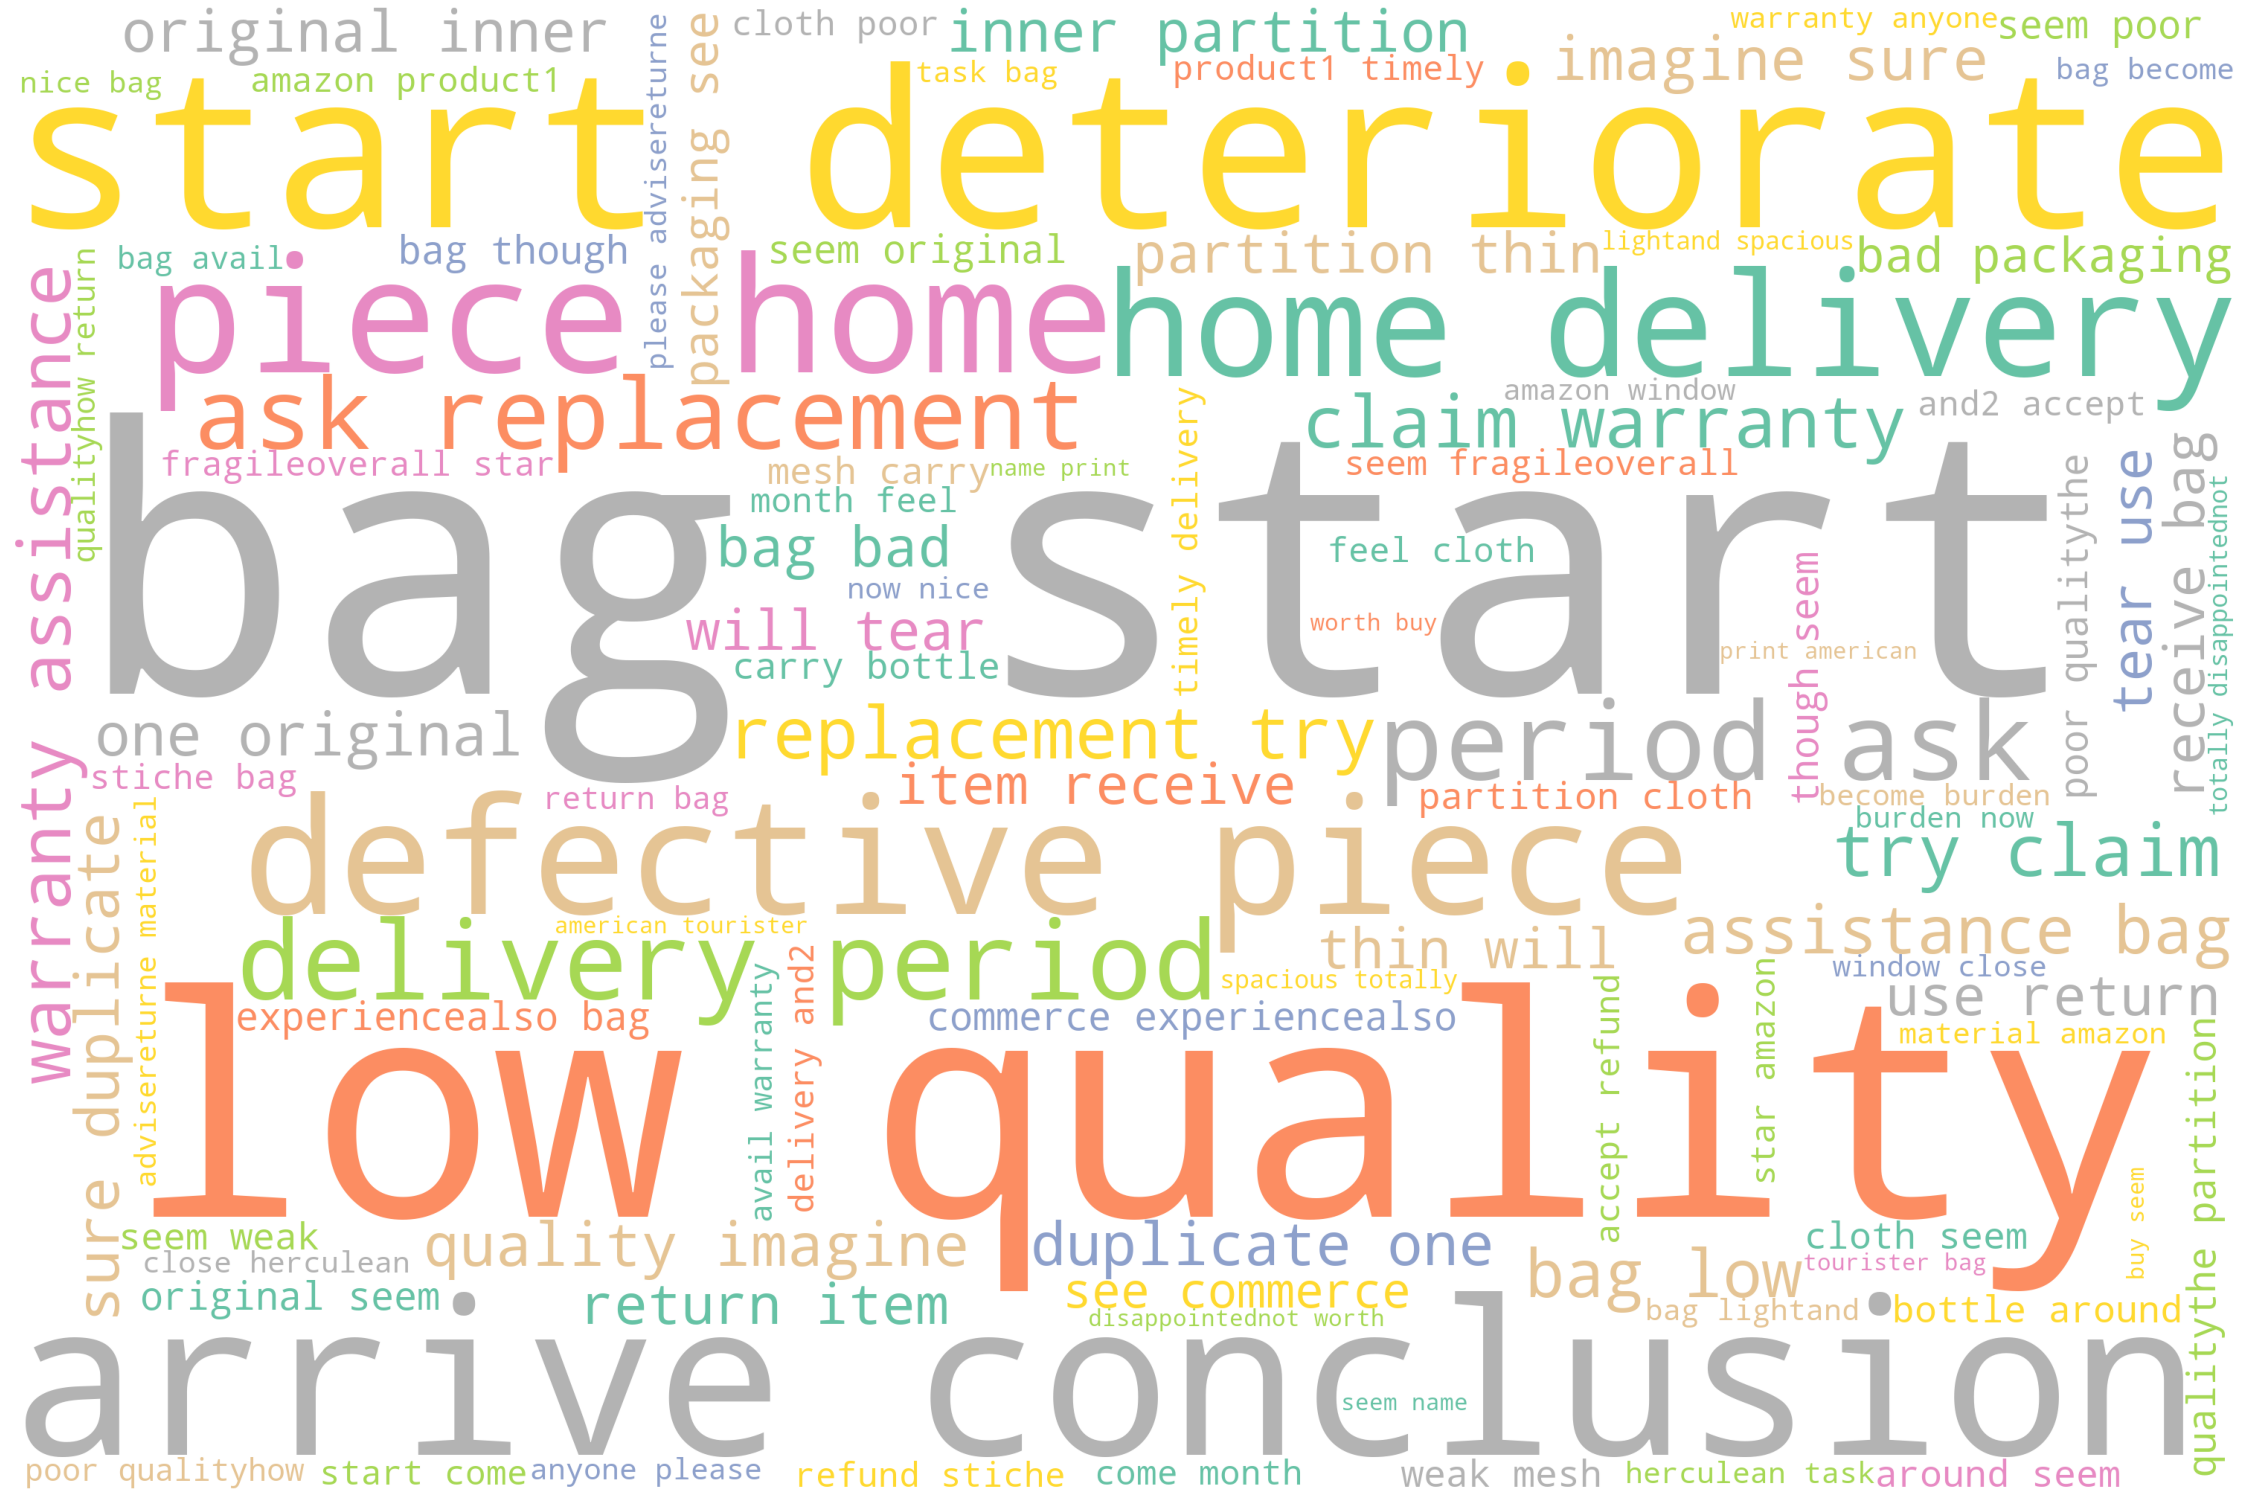

In [50]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(cl_rev)
plot_cloud(wordcloud)

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=cl_rev
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

In [53]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in('NOUN', 'VERB')]
print(nouns_verbs[1567:1924])

['websitesthis', 'case', 'conclusion', 'year', 'experience', 'period', 'have', 'purchase', 'bag', 'start', 'deteriorate', 'passage', 'year', 'get', 'piece', 'be', 'home', 'delivery', 'period', 'ask', 'replacement', 'try', 'claim', 'warranty', 'get', 'assistance', 'bag', 'quality', 'imagine', 'be', 'duplicate', 'one', 'partition', 'tear', 'use', 'return', 'item', 'receive', 'bag', 'packaging', 'see', 'bag', 'seem', 'seem', 'partition', 'cloth', 'seem', 'mesh', 'carry', 'bottle', 'seem', 'fragileoverall', 'star', 'amazon', 'product1', 'delivery', 'and2', 'accept', 'refund', 'stiche', 'bag', 'start', 'come', 'month', 'feel', 'cloth', 'qualityhow', 'return', 'bag', 'avail', 'warranty', 'advisereturne', 'material', 'window', 'be', 'herculean', 'task', 'bag', 'become', 'burden', 'bag', 'lightand', 'disappointednot', 'buy', 'seem', 'name', 'print', 'bag', 'brand', 'quality', 'time', 'product', 'lookshave', 'space', 'day', 'travelfabric', 'get', 'price', 'get', 'look', 'feel', 'term', 'usage',

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0      bag   5940
1      get   1980
2       be   1980
3     seem   1980
4  quality   1584
5    start   1584
6   amazon   1188
7  product   1188
8     look   1188
9    usage   1188

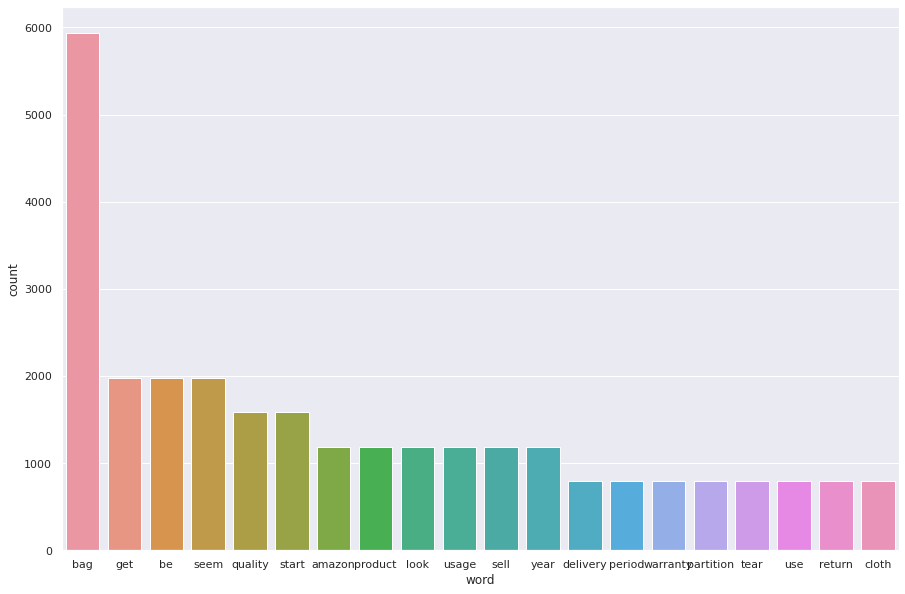

In [57]:
plt.figure(figsize = (15,10))
sns.barplot(x = wd_df['word'][0:20], y = wd_df['count'][0:20])

In [63]:
afinn = pd.read_csv('/content/Afinn.csv', sep = ',', encoding = 'latin-1')
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [64]:
afinn.shape

(2477, 2)

In [65]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
list(itertools.islice(affinity_scores.items(), 20))

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [66]:
from nltk import tokenize
sen=tokenize.sent_tokenize(' '.join(data))
sen

['I got a defective piece.',
 "Since I was not at my home during the delivery period, I couldn't ask for replacement.",
 "I'm trying to claim warranty, but I didn't get any assistance.",
 'This bag is of the lowest quality you can imagine.',
 "I am sure it's a duplicate one and not original.",
 'The inner partitions are so thin that they will tear off after 3-4 use.',
 'Returning the item.',
 'Received the bag in the worst packaging I have seen in my e commerce experience.Also the bag though seemed original seemed to be of poor quality.The partition cloth seemed weak and the mesh for carrying bottle around seemed fragile.Overall 2 stars for Amazon and not for the product1 for timely delivery, and2 for accepting the refund!',
 'The stiches of the  bag is started coming out in 6 months.',
 'Feel the cloth is of poor quality.how to return the bag for availing the warranty, can anyone please adviseReturning the materials after the Amazon window closes is an Herculean task, the bag has beco

In [67]:
sen_df = pd.DataFrame(sen,columns=['sentence'])
sen_df

sentence
0                              I got a defective piece.
1     Since I was not at my home during the delivery...
2     I'm trying to claim warranty, but I didn't get...
3     This bag is of the lowest quality you can imag...
4      I am sure it's a duplicate one and not original.
...                                                 ...
8707  But with the passage of time and continuous us...
8708  And after 1 year and 2 months it has started t...
8709  On the other hand my son is using school bag o...
8710  I have arrived on this conclusion after 3-4 ye...
8711  All the bags started deteriorating after passa...

[8712 rows x 1 columns]

In [68]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [70]:
calculate_sentiment(text='poor')

-2

In [71]:
sen_df['sentiment_value'] = sen_df['sentence'].apply(calculate_sentiment)

In [72]:
sen_df['word_count'] = sen_df['sentence'].str.split().apply(len)
sen_df['word_count'].head(10)

0     5
1    16
2    11
3    10
4    10
5    14
6     3
7    56
8    12
9    45
Name: word_count, dtype: int64

In [73]:
sen_df['word_count'] = sen_df['sentence'].str.split().apply(len)
sen_df['word_count'].head(10)

0     5
1    16
2    11
3    10
4    10
5    14
6     3
7    56
8    12
9    45
Name: word_count, dtype: int64

In [74]:
sen_df['sentiment_value'].describe()

count    8712.000000
mean        0.636364
std         3.213020
min        -6.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [75]:
sen_df[sen_df['sentiment_value']>=11].head()

sentence  sentiment_value  \
15   I got this for 803 ...at this price it's great...               12   
37   I got this for 803 ...at this price it's great...               12   
59   I got this for 803 ...at this price it's great...               12   
81   I got this for 803 ...at this price it's great...               12   
103  I got this for 803 ...at this price it's great...               12   

     word_count  
15           44  
37           44  
59           44  
81           44  
103          44

In [78]:
sen_df[sen_df['sentiment_value']<-4].head()

sentence  sentiment_value  \
7   Received the bag in the worst packaging I have...               -6   
29  Received the bag in the worst packaging I have...               -6   
51  Received the bag in the worst packaging I have...               -6   
73  Received the bag in the worst packaging I have...               -6   
95  Received the bag in the worst packaging I have...               -6   

    word_count  index  
7           56      7  
29          56     29  
51          56     51  
73          56     73  
95          56     95

In [79]:
sen_df['index']=range(0,len(sen_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


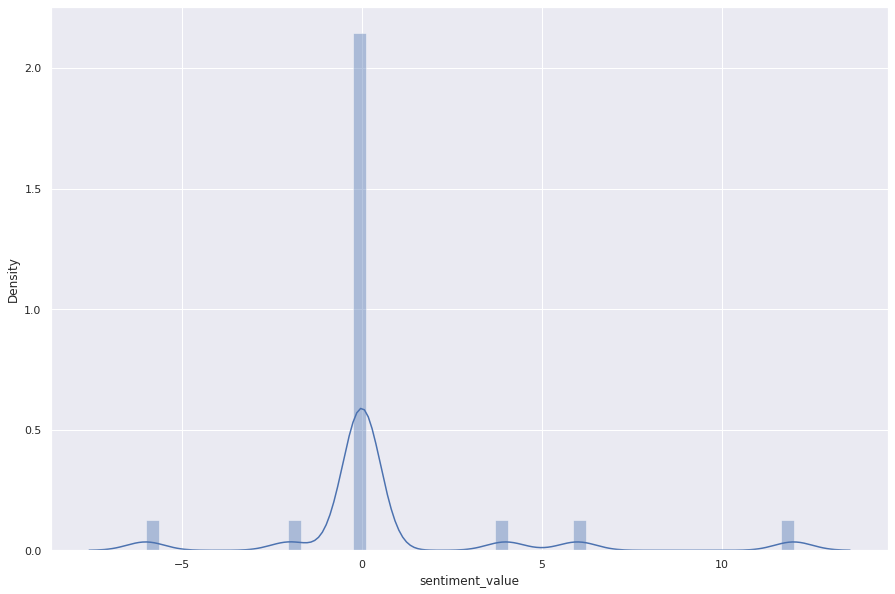

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(sen_df['sentiment_value'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


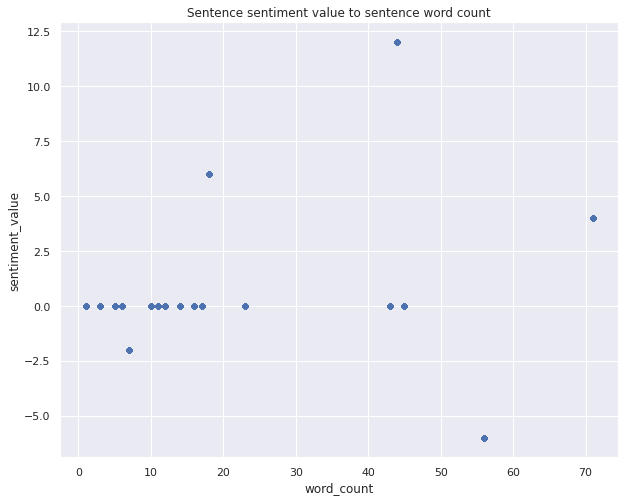

In [82]:
sen_df.plot.scatter(x='word_count',y ='sentiment_value',figsize = (10,8),title='Sentence sentiment value to sentence word count')